This is paused until I know the size.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import os
from glob import glob
from os.path import join as pathjoin
import h5py
import time

import imp
import donglab_workflows as dw
imp.reload(dw)
import PIL.Image as Image
Image.MAX_IMAGE_PIXELS = None
import tifffile as tf # for 16 bit tiff

# downsample lightsheet

The mit data is stored in tif stacks
the size is
Image resolution is 1.8 µm x 1.8 µm x 2.0 µm (xyz), and the stack can be found at our network storage space at BMAP.



In [2]:
# filename
#input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_488_Em_0.ims'
#input_filename = '/home/dtward/bmaproot/panfs/dong/Scans/3D/sw210111-01/Raw_LS_4X/sw210111-01-4X_ZStep4um_75p4ms_Stitched_Ex_561_Em_1.ims'
input_directory = '/home/dtward/bmaproot/panfs/dong/R01_Yin/642nm_NeuN'
input_directory = '/home/dtward/bmaproot/panfs/dong/HANPENG/tissuevision/phase one/134-2-001/134-2-001_BLK-20210408-02_20210521-01_SAN-09MAR2021-04'
pattern = '*ch01.tif'
output_filename = None # generate automatically if None

# we need a temporary output directory for intermediate results (each slice)
outdir = 'donglab_hanpeng_v00'

dI = np.array([50.0,1.2,1.2]) # we need to input the voxel size, slice thickness first, in microns
res = 50.0
dataset_string = '' # this is not used for tifs


In [3]:
if output_filename is None:
    output_filename = os.path.splitext(os.path.split(input_directory)[-1])[0] + '_down.npz'
print(f'Input directory is {input_directory}')
print(f'Output filename is {output_filename}')
print(f'Resolution is {dI}')
print(f'Desired resolution is {res}')
print(f'Dataset string is {dataset_string}')

# temporary output dir
if not os.path.exists(outdir):
    os.mkdir(outdir)

Input directory is /home/dtward/bmaproot/panfs/dong/HANPENG/tissuevision/phase one/134-2-001/134-2-001_BLK-20210408-02_20210521-01_SAN-09MAR2021-04
Output filename is 134-2-001_BLK-20210408-02_20210521-01_SAN-09MAR2021-04_down.npz
Resolution is [50.   1.2  1.2]
Desired resolution is 50.0
Dataset string is 


In [4]:
# I want 50 micron
down = np.floor(res/dI).astype(int)
print(f'Downsampling factors are {down}')
print(f'Downsampled res {dI*down}')

Downsampling factors are [ 1 41 41]
Downsampled res [50.  49.2 49.2]


In [5]:
# build a tif class with similar interface
class TifStack:
    '''We need a tif stack with an interface that will load a slice one at a time
    We assume each tif has the same size
    We assume 16
    '''
    def __init__(self,input_directory,pattern='*.tif'):
        self.input_directory = input_directory
        self.pattern = pattern
        self.files = glob(pathjoin(input_directory,pattern))
        self.files.sort()
        test = Image.open(self.files[0])
        self.nxy = test.size
        test.close()
        self.nz = len(self.files)
        self.shape = (self.nz,self.nxy[1],self.nxy[0]) # note, it is xy not rowcol
    def __getitem__(self,i):
        return tf.imread(self.files[i])/(2**16-1)
    def __len__(self):
        return len(self.files)
    def close(self):
        pass # nothing necessary
    


In [6]:
# load the data
data = TifStack(input_directory,pattern)

In [7]:
print(f'Dataset shape {data.shape}')

Dataset shape (300, 8470, 10640)


In [8]:
nI = np.array(data.shape)
xI = [np.arange(n)*d - (n-1)/2.0*d for n,d in zip(nI,dI)]

In [9]:
xId = [dw.downsample(x,[d]) for x,d in zip(xI,down)]
dId = [x[1]-x[0] for x in xId]

In [10]:
dId

[50.0, 49.19999999999891, 49.20000000000255]

<IPython.core.display.Javascript object>


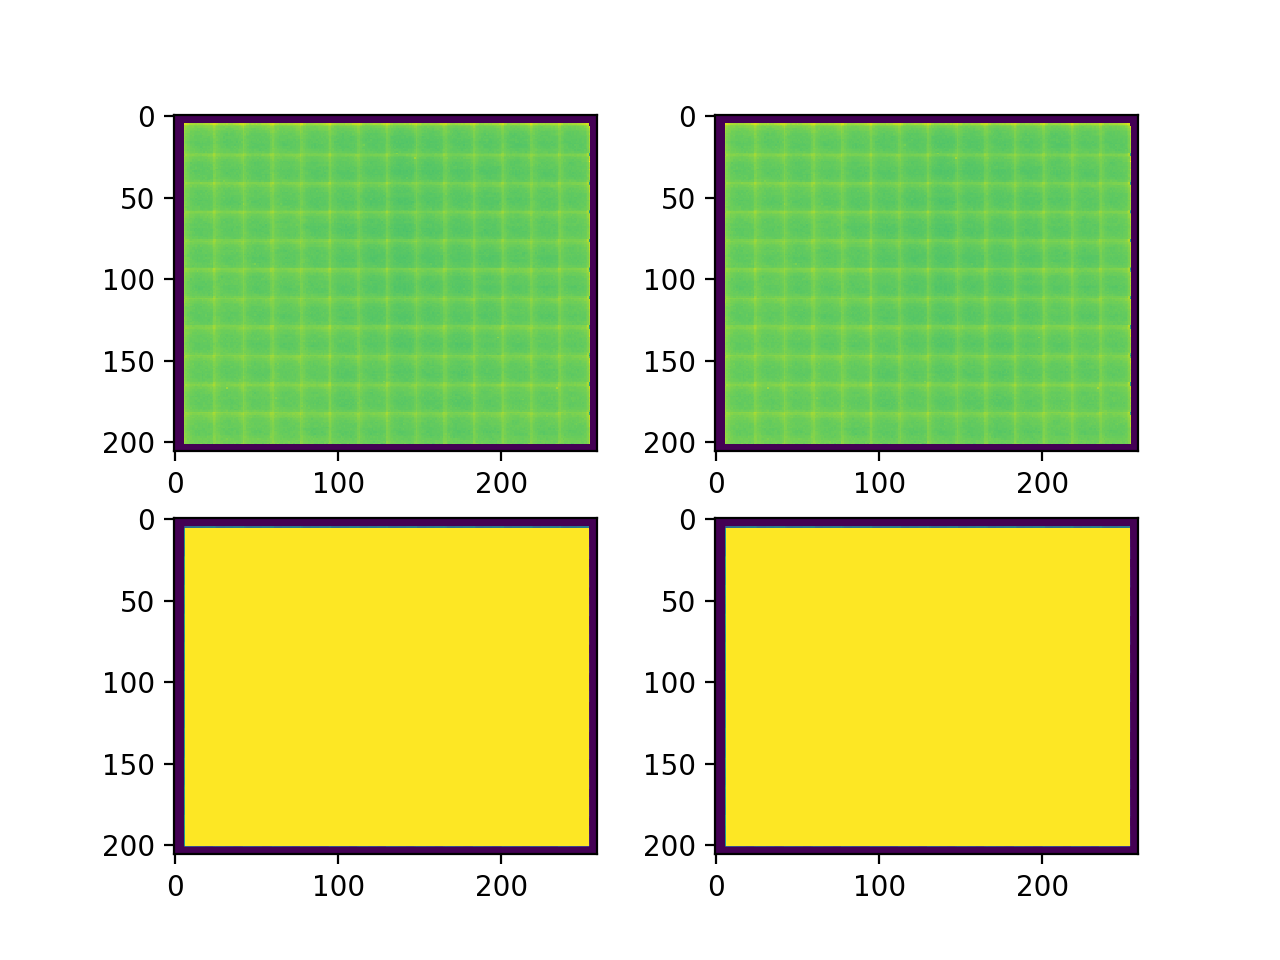

/home/dtward/.local/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in true_divide


Finished loading slice 0 of 300, time 0.16332101821899414 s


/home/dtward/.local/intelpython3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Finished loading slice 1 of 300, time 8.726288318634033 s
Finished loading slice 2 of 300, time 8.4130277633667 s
Finished loading slice 3 of 300, time 7.83599328994751 s
Finished loading slice 4 of 300, time 7.994731426239014 s
Finished loading slice 5 of 300, time 9.54172682762146 s
Finished loading slice 6 of 300, time 8.319270372390747 s
Finished loading slice 7 of 300, time 8.003288745880127 s
Finished loading slice 8 of 300, time 8.120199918746948 s
Finished loading slice 9 of 300, time 9.08372950553894 s
Finished loading slice 10 of 300, time 7.965021371841431 s
Finished loading slice 11 of 300, time 8.047187805175781 s
Finished loading slice 12 of 300, time 8.44664978981018 s
Finished loading slice 13 of 300, time 8.942700624465942 s
Finished loading slice 14 of 300, time 8.150325059890747 s
Finished loading slice 15 of 300, time 8.024088621139526 s
Finished loading slice 16 of 300, time 8.684691429138184 s
Finished loading slice 17 of 300, time 8.010672330856323 s
Finished loa

Finished loading slice 140 of 300, time 9.828280210494995 s
Finished loading slice 141 of 300, time 8.204412460327148 s
Finished loading slice 142 of 300, time 8.71961498260498 s
Finished loading slice 143 of 300, time 8.178934097290039 s
Finished loading slice 144 of 300, time 8.400418281555176 s
Finished loading slice 145 of 300, time 8.113296508789062 s
Finished loading slice 146 of 300, time 8.12606692314148 s
Finished loading slice 147 of 300, time 8.23595905303955 s
Finished loading slice 148 of 300, time 8.057137966156006 s
Finished loading slice 149 of 300, time 7.976369142532349 s
Finished loading slice 150 of 300, time 8.058465242385864 s
Finished loading slice 151 of 300, time 7.960580110549927 s
Finished loading slice 152 of 300, time 7.8315465450286865 s
Finished loading slice 153 of 300, time 8.022680759429932 s
Finished loading slice 154 of 300, time 8.052932024002075 s
Finished loading slice 155 of 300, time 8.894304513931274 s
Finished loading slice 156 of 300, time 8.

Finished loading slice 277 of 300, time 7.6183552742004395 s
Finished loading slice 278 of 300, time 7.375110149383545 s
Finished loading slice 279 of 300, time 7.458364248275757 s
Finished loading slice 280 of 300, time 8.299442529678345 s
Finished loading slice 281 of 300, time 9.27915644645691 s
Finished loading slice 282 of 300, time 7.3954362869262695 s
Finished loading slice 283 of 300, time 7.4022417068481445 s
Finished loading slice 284 of 300, time 7.519707918167114 s
Finished loading slice 285 of 300, time 7.349033355712891 s
Finished loading slice 286 of 300, time 7.444384813308716 s
Finished loading slice 287 of 300, time 7.423876047134399 s
Finished loading slice 288 of 300, time 7.436462163925171 s
Finished loading slice 289 of 300, time 7.514090061187744 s
Finished loading slice 290 of 300, time 7.897594213485718 s
Finished loading slice 291 of 300, time 7.363706827163696 s
Finished loading slice 292 of 300, time 7.449775695800781 s
Finished loading slice 293 of 300, tim

In [11]:
# okay now I have to iterate over the dataset
# we need to save intermediate outputs (each slice) in case of errors
fig,ax = plt.subplots(2,2)
ax = ax.ravel()
working = []
workingw = []
output = []
outputw = []
start = time.time()
for i in range(data.shape[0]):
    starti = time.time()
    outname = os.path.join(outdir,f'{i:04d}.npy')
    outnamew = os.path.join(outdir,f'{i:04d}_w.npy')
    if os.path.exists(outname):
        sd = np.load(outname)
        wd = np.load(outnamew)        
    else:
        s = data[i]**0.25 # test reduce dynamic range before downsampling with this power
        w = (data[i]!=0)
        
        sd = dw.downsample((s*w).astype(float),down[1:])
        wd = dw.downsample((w).astype(float),down[1:])
        sd /= wd
        sd[wd==0]=0
        
        np.save(outname,sd)
        np.save(outnamew,wd)
    
    ax[0].cla()
    ax[0].imshow(sd)
    ax[2].cla()
    ax[2].imshow(wd)
    
    working.append(sd)
    workingw.append(wd)
    
    if len(working) == down[0]:
        
        out = dw.downsample(np.stack(working)*np.stack(workingw),[down[0],1,1])
        outw = dw.downsample(np.stack(workingw),[down[0],1,1])
        out /= outw
        out[outw==0] = 0
        ax[1].cla()
        ax[1].imshow(out[0])
        ax[3].cla()
        ax[3].imshow(outw[0])
        output.append(out)
        outputw.append(outw)
        working = []
        workingw = []
    fig.canvas.draw()
    print(f'Finished loading slice {i} of {data.shape[0]}, time {time.time() - starti} s')
output = np.concatenate(output)   
outputw = np.concatenate(outputw)   
Id = output
wd = outputw
print(f'Finished downsampling, time {time.time() - start}')

In [12]:
[o.shape for o in output]

[(206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),
 (206, 259),

In [13]:
np.savez(output_filename,I=Id,W=wd,xI=np.array(xId,dtype='object')) # note specify object to avoid "ragged" warning

<IPython.core.display.Javascript object>


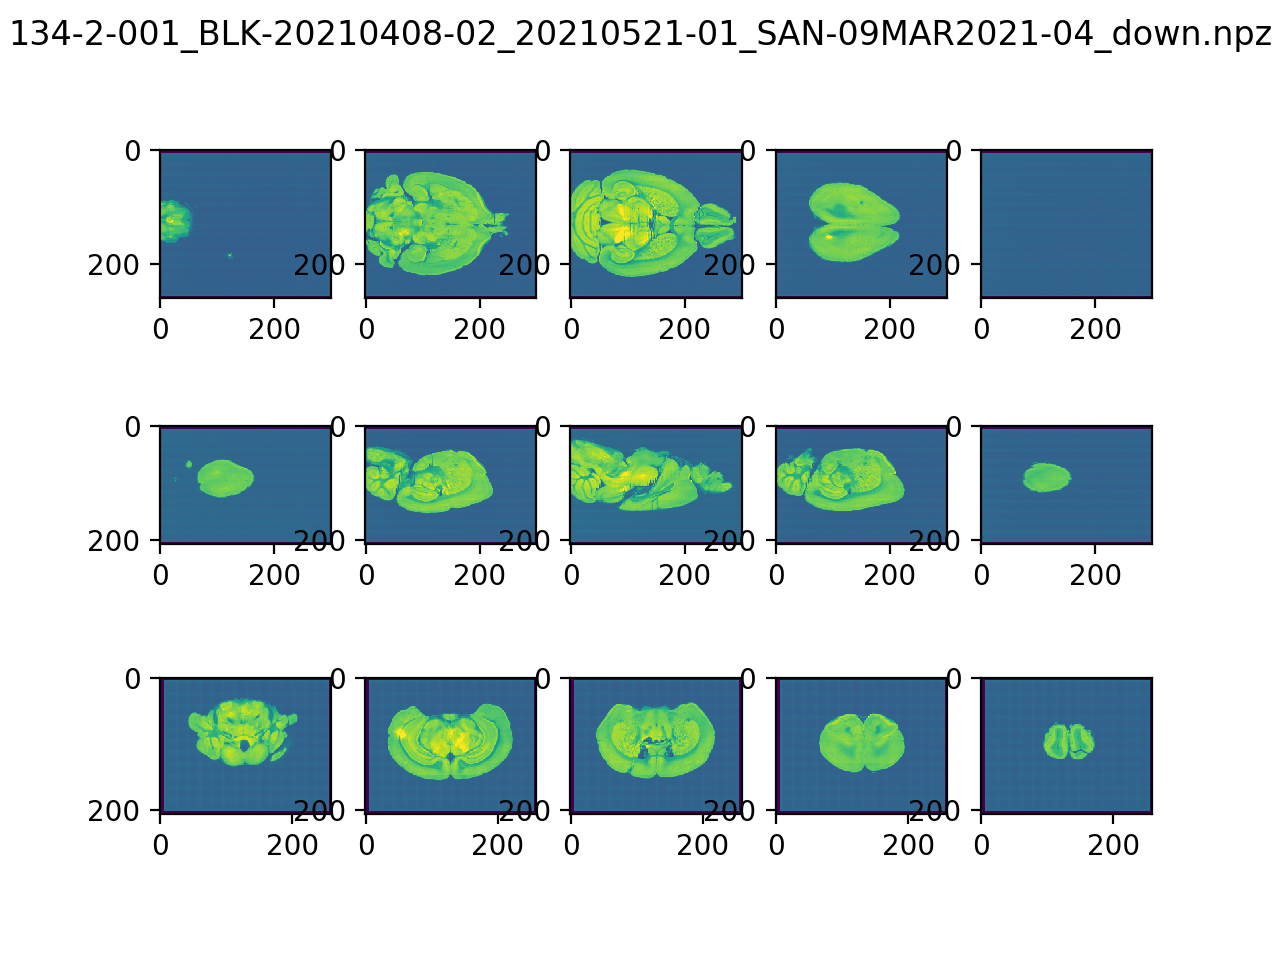

4294967296 4294967296


In [14]:
imp.reload(dw)
fig,ax = dw.draw_slices(Id,xId)
fig.suptitle(output_filename)
fig.savefig(output_filename.replace('npz','jpg'))

In [ ]:
# note on slice 299 of 300 (the last slice)
# I got some error

#ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 313 and the array at index 17 has size 206



In [ ]:
wd.shape,w.shape,sd.shape